In [118]:
import zipfile
import numpy as np

import glob
import re
import pandas as pd

# read the dataset using the compression zip
all_data = pd.read_csv('all_data_for_analysis.zip',compression='zip')

In [119]:
pd.set_option('display.max_rows', 100)

In [120]:
all_data['Count'] = 1

Drop nulls in comments

In [121]:
all_data = all_data.dropna(subset=['Comment'])
all_data = all_data.dropna(subset=['Author'])
all_data = all_data.dropna(subset=['Date'])
all_data = all_data.dropna(subset=['main_author'])

In [122]:
all_data.isna().sum()

PR_number                       0
Comment                         0
Author                          0
Date                            0
Commit_message               8927
Descriptions                    2
status                          0
main_author                     0
revision_number                 0
url                             0
PR_number_no_patch_number       0
comment_length                  0
Flesch-Kincaid                  0
Count                           0
dtype: int64

In [123]:
all_data['PR_number_no_patch_number'] = all_data['PR_number'].str[:6]

In [124]:
all_data

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count
0,12050_rev2_d,I would prefer that you didn't submit thisI w...,Kenny Maynard,2012-01-04 22:01:33.920000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,318,77.27,1
1,12050_rev2_d,You also need to fix the commit message so it ...,Kenny Maynard,2012-01-04 22:02:19.848000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,77,80.62,1
2,12050_rev2_d,I would prefer that you didn't submit this-1 ...,Kenny Maynard,2012-01-05 22:42:21.672000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,76,66.74,1
3,12050_rev2_d,"I don't have a huge opinion on it, really. My...",Noah Dean,2012-01-06 03:50:33.697000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,388,70.33,1
4,12050_rev3_d,"I think Rags is working on this today too, so ...",Andreas Short,2012-01-08 21:36:57.811000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,3,http://review.couchbase.org/#/c/12050/3,12050_,161,73.17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30096,80604_rev2_d,Got it - will remember that.,Ellie Kidd,2017-07-13 18:41:21.038000000,NaN,CBQE-3067: Use better FTS level compaction con...,1,Ellie Kidd,2,http://review.couchbase.org/#/c/80604/2,80604_,28,83.32,1
30097,80992_rev1_d,MemoryQuota may set in param with default valu...,Frederick Booker,2017-07-18 15:43:30.472000000,NaN,CBQE-4209: Added the cbas installation and ser...,1,Alfred Park,1,http://review.couchbase.org/#/c/80992/1,80992_,113,94.15,1
30098,82094_rev1_d,This change has already been reviewed by dev f...,Monique Barker,2017-08-09 02:25:02.503000000,NaN,Adding subquery tests to watson branch.,1,Dylan Paul,1,http://review.couchbase.org/#/c/82094/1,82094_,95,72.32,1
30099,84162_rev1_d,test suite lww in entbackup restore is also re...,Frederick Booker,2017-10-09 19:52:13.747000000,NaN,CBQE-1898 lww tests are covered in py-entbacku...,1,Frederick Booker,1,http://review.couchbase.org/#/c/84162/1,84162_,61,68.77,1


In [125]:
only_merged = all_data[all_data['status']==1]

In [126]:
only_abandoned = all_data[all_data['status']==0]

In [127]:
only_abandoned.count()

PR_number                    6427
Comment                      6427
Author                       6427
Date                         6427
Commit_message               4195
Descriptions                 6425
status                       6427
main_author                  6427
revision_number              6427
url                          6427
PR_number_no_patch_number    6427
comment_length               6427
Flesch-Kincaid               6427
Count                        6427
dtype: int64

In [128]:
only_merged.count()

PR_number                    23672
Comment                      23672
Author                       23672
Date                         23672
Commit_message               16977
Descriptions                 23672
status                       23672
main_author                  23672
revision_number              23672
url                          23672
PR_number_no_patch_number    23672
comment_length               23672
Flesch-Kincaid               23672
Count                        23672
dtype: int64

Join all comments from PRs that have been merged

In [129]:
all_comments = ''.join(only_abandoned['Comment'])

In [130]:
from rake_nltk import Rake
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GNR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [131]:
r = Rake()
r.extract_keywords_from_text(all_comments)

In [132]:
dict(sorted(r.get_word_degrees().items(), key=lambda item: item[1], reverse=True))

{'abandoned': 3748,
 'commit': 2266,
 'good': 1827,
 'looks': 1826,
 'branch': 1745,
 'change': 1652,
 '1': 1647,
 'would': 1605,
 'rebase': 1465,
 'script': 1324,
 'patchset': 1323,
 'patch': 1306,
 '->': 1305,
 'trivial': 1304,
 'detection': 1302,
 'comment': 1297,
 'inline': 1140,
 'submit': 1120,
 'someone': 1020,
 'villegas': 1019,
 'roselyn': 1014,
 'prefer': 1013,
 'else': 1009,
 'must': 1004,
 'new': 1003,
 'message': 928,
 'merge': 921,
 'abandonedwrong': 901,
 'id': 852,
 'previous': 810,
 'test': 796,
 'one': 776,
 'like': 735,
 'please': 674,
 'matches': 672,
 'abandonedduplicate': 654,
 'well': 621,
 'also': 612,
 'eclipse': 599,
 'review': 594,
 'need': 587,
 'java': 554,
 'code': 543,
 'restricted': 533,
 'think': 526,
 'use': 500,
 'line': 496,
 'set': 488,
 '...': 484,
 'approve': 478,
 'changes': 474,
 'still': 473,
 '2': 459,
 'gerrit': 450,
 'org': 448,
 'approved': 441,
 '0': 426,
 'jgit': 425,
 'see': 416,
 ').': 416,
 'tests': 403,
 'fix': 401,
 'get': 393,
 'add

# Sentiment Analysis

In [133]:
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#sid_obj= SentimentIntensityAnalyzer()

In [134]:
from textblob import TextBlob

In [135]:
x = TextBlob("I am Jake and I am good").sentiment
x

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [136]:
all_data['Polarity'] = 0
all_data['Subjectivity'] = 0
for n in range(len(all_data)):
    all_data['Polarity'].iloc[n] = TextBlob(all_data['Comment'].iloc[n]).sentiment.polarity
    all_data['Subjectivity'].iloc[n] = TextBlob(all_data['Comment'].iloc[n]).sentiment.subjectivity

C:\Users\GNR\AppData\Local\Temp\ipykernel_7024\1903632213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Polarity'].iloc[n] = TextBlob(all_data['Comment'].iloc[n]).sentiment.polarity
C:\Users\GNR\AppData\Local\Temp\ipykernel_7024\1903632213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Subjectivity'].iloc[n] = TextBlob(all_data['Comment'].iloc[n]).sentiment.subjectivity


In [137]:
all_data

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
0,12050_rev2_d,I would prefer that you didn't submit thisI w...,Kenny Maynard,2012-01-04 22:01:33.920000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,318,77.27,1,0.000000,0.362500
1,12050_rev2_d,You also need to fix the commit message so it ...,Kenny Maynard,2012-01-04 22:02:19.848000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,77,80.62,1,0.000000,1.000000
2,12050_rev2_d,I would prefer that you didn't submit this-1 ...,Kenny Maynard,2012-01-05 22:42:21.672000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,76,66.74,1,0.000000,0.000000
3,12050_rev2_d,"I don't have a huge opinion on it, really. My...",Noah Dean,2012-01-06 03:50:33.697000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,388,70.33,1,0.068750,0.418750
4,12050_rev3_d,"I think Rags is working on this today too, so ...",Andreas Short,2012-01-08 21:36:57.811000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,3,http://review.couchbase.org/#/c/12050/3,12050_,161,73.17,1,0.118182,0.677273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30096,80604_rev2_d,Got it - will remember that.,Ellie Kidd,2017-07-13 18:41:21.038000000,NaN,CBQE-3067: Use better FTS level compaction con...,1,Ellie Kidd,2,http://review.couchbase.org/#/c/80604/2,80604_,28,83.32,1,0.000000,0.000000
30097,80992_rev1_d,MemoryQuota may set in param with default valu...,Frederick Booker,2017-07-18 15:43:30.472000000,NaN,CBQE-4209: Added the cbas installation and ser...,1,Alfred Park,1,http://review.couchbase.org/#/c/80992/1,80992_,113,94.15,1,0.000000,0.000000
30098,82094_rev1_d,This change has already been reviewed by dev f...,Monique Barker,2017-08-09 02:25:02.503000000,NaN,Adding subquery tests to watson branch.,1,Dylan Paul,1,http://review.couchbase.org/#/c/82094/1,82094_,95,72.32,1,0.000000,0.000000
30099,84162_rev1_d,test suite lww in entbackup restore is also re...,Frederick Booker,2017-10-09 19:52:13.747000000,NaN,CBQE-1898 lww tests are covered in py-entbacku...,1,Frederick Booker,1,http://review.couchbase.org/#/c/84162/1,84162_,61,68.77,1,0.000000,0.000000


In [138]:
all_data['Flesch-Kincaid'].mean()

63.505089205621445

## Finding outliers

In [139]:
#import seaborn as sns
#sns.boxplot(all_data['Flesch-Kincaid'])

The algorithm is found here https://pythonsansar.com/how-to-remove-outliers-in-python-pandas-package/ 

In [140]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(all_data, "Flesch-Kincaid")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  151.155
Lower Whisker:  -18.005000000000003


Here we take a look at outliers.

In [141]:
all_data[(all_data['Flesch-Kincaid'] < lower) | (all_data['Flesch-Kincaid'] > upper)]

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
101,16338_rev1_d,"(1 inline comment)Line:86, src/main/java/com/...",Andreas Short,2012-06-01 23:50:18.929000000,NaN,Ensure config update checks do not overwhelm t...,1,Cory Peck,1,http://review.couchbase.org/#/c/16338/1,16338_,115,-126.67,1,0.00,0.00
102,16338_rev1_d,"(1 inline comment)Line:86, src/main/java/com/...",Andreas Short,2012-07-20 07:02:32.145000000,NaN,Ensure config update checks do not overwhelm t...,1,Cory Peck,1,http://review.couchbase.org/#/c/16338/1,16338_,102,-221.25,1,0.00,0.00
190,21197_rev1_d,AbandonedOops,Kenny Maynard,2012-09-28 17:38:17.769000000,The Authentication is initiated based on the n...,JCBC-70: Fix Authentication to non-default buc...,0,Emerson Nolan,1,http://review.couchbase.org/#/c/21197/1,21197_,14,-47.99,1,0.00,0.00
237,25482_rev2_d,AbandonedTested,Yasmin Rush,2013-05-16 09:36:45.172000000,NaN,JCBC-274: Fix for NPE in observe tests when fu...,0,Ayla Reynolds,2,http://review.couchbase.org/#/c/25482/2,25482_,16,-47.99,1,0.00,0.00
258,26725_rev2_d,AbandonedPushed another commit,Lawson French,2013-06-06 07:17:50.410000000,NaN,fix readme 314,0,Lawson French,2,http://review.couchbase.org/#/c/26725/2,26725_,31,-24.64,1,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,34682_rev4_d,"Result of 20% DGM runtest_view_ops,ddoc_ops=cr...",Moises Brennan,2014-03-25 07:35:00.544000000,NaN,CBQE-2085 add tests for views - heavy dgm,1,Justus Ortiz,4,http://review.couchbase.org/#/c/34682/4,34682_,204,-197.90,1,0.00,0.00
29401,36939_rev5_d,+ incomprehensible commit message,Esperanza Cherry,2014-05-14 10:07:44.443000000,commented out code in progress. used camel cas...,removed new codecommented out code in progress...,0,Linda Vaughansingh,5,http://review.couchbase.org/#/c/36939/5,36939_,34,-75.40,1,0.00,0.00
29785,44970_rev4_d,[tuq_client]goroot:/tmp/tuq_git/gogopath:/tmp/...,Trevor Santana,2015-01-06 17:56:39.169000000,add sherlock_path variable to tuq_client sections,CBQE-2541: get available path for sherlock MAC...,1,Trevor SantanaMironava,4,http://review.couchbase.org/#/c/44970/4,44970_,82,-809.39,1,0.00,0.00
29794,44995_rev8_d,There was a bug when passing services_init. Fi...,Quentin Ali,2015-01-07 01:57:10.642000000,- We can provision 1 node cluster with data se...,CBQE-2542 :: Add support for configuring singl...,1,Quentin Ali,8,http://review.couchbase.org/#/c/44995/8,44995_,376,-102.81,1,0.05,0.15


Removing outliers and create new dataframe.

In [142]:
all_data_no_read_outliers = all_data[(all_data['Flesch-Kincaid'] > lower) & (all_data['Flesch-Kincaid'] < upper)]

In [143]:
all_data_no_read_outliers

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
0,12050_rev2_d,I would prefer that you didn't submit thisI w...,Kenny Maynard,2012-01-04 22:01:33.920000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,318,77.27,1,0.000000,0.362500
1,12050_rev2_d,You also need to fix the commit message so it ...,Kenny Maynard,2012-01-04 22:02:19.848000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,77,80.62,1,0.000000,1.000000
2,12050_rev2_d,I would prefer that you didn't submit this-1 ...,Kenny Maynard,2012-01-05 22:42:21.672000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,76,66.74,1,0.000000,0.000000
3,12050_rev2_d,"I don't have a huge opinion on it, really. My...",Noah Dean,2012-01-06 03:50:33.697000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,388,70.33,1,0.068750,0.418750
4,12050_rev3_d,"I think Rags is working on this today too, so ...",Andreas Short,2012-01-08 21:36:57.811000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,3,http://review.couchbase.org/#/c/12050/3,12050_,161,73.17,1,0.118182,0.677273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30096,80604_rev2_d,Got it - will remember that.,Ellie Kidd,2017-07-13 18:41:21.038000000,NaN,CBQE-3067: Use better FTS level compaction con...,1,Ellie Kidd,2,http://review.couchbase.org/#/c/80604/2,80604_,28,83.32,1,0.000000,0.000000
30097,80992_rev1_d,MemoryQuota may set in param with default valu...,Frederick Booker,2017-07-18 15:43:30.472000000,NaN,CBQE-4209: Added the cbas installation and ser...,1,Alfred Park,1,http://review.couchbase.org/#/c/80992/1,80992_,113,94.15,1,0.000000,0.000000
30098,82094_rev1_d,This change has already been reviewed by dev f...,Monique Barker,2017-08-09 02:25:02.503000000,NaN,Adding subquery tests to watson branch.,1,Dylan Paul,1,http://review.couchbase.org/#/c/82094/1,82094_,95,72.32,1,0.000000,0.000000
30099,84162_rev1_d,test suite lww in entbackup restore is also re...,Frederick Booker,2017-10-09 19:52:13.747000000,NaN,CBQE-1898 lww tests are covered in py-entbacku...,1,Frederick Booker,1,http://review.couchbase.org/#/c/84162/1,84162_,61,68.77,1,0.000000,0.000000


In [144]:
all_data_no_read_outliers['Flesch-Kincaid'].mean()

67.45717330704379

In [145]:
#sns.boxplot(all_data_no_read_outliers['Flesch-Kincaid'])

Checking for outliers in Sentiment analysis.

In [146]:
#sns.boxplot(all_data_no_read_outliers['Polarity'])

In [147]:
#sns.boxplot(all_data_no_read_outliers['Subjectivity'])

In [148]:
upper, lower = outliers(all_data_no_read_outliers, "Polarity")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  1.7499999999999998
Lower Whisker:  -1.0499999999999998


In [149]:
all_data_no_read_outliers = all_data_no_read_outliers[(all_data_no_read_outliers['Polarity'] > lower) & (all_data_no_read_outliers['Polarity'] < upper)]

In [150]:
upper, lower = outliers(all_data_no_read_outliers, "Subjectivity")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  1.5000000000000002
Lower Whisker:  -0.9000000000000001


In [151]:
all_data_no_read_outliers = all_data_no_read_outliers[(all_data_no_read_outliers['Subjectivity'] > lower) & (all_data_no_read_outliers['Subjectivity'] < upper)]

In [152]:
all_data_no_read_outliers

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
0,12050_rev2_d,I would prefer that you didn't submit thisI w...,Kenny Maynard,2012-01-04 22:01:33.920000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,318,77.27,1,0.000000,0.362500
1,12050_rev2_d,You also need to fix the commit message so it ...,Kenny Maynard,2012-01-04 22:02:19.848000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,77,80.62,1,0.000000,1.000000
2,12050_rev2_d,I would prefer that you didn't submit this-1 ...,Kenny Maynard,2012-01-05 22:42:21.672000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,76,66.74,1,0.000000,0.000000
3,12050_rev2_d,"I don't have a huge opinion on it, really. My...",Noah Dean,2012-01-06 03:50:33.697000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,388,70.33,1,0.068750,0.418750
4,12050_rev3_d,"I think Rags is working on this today too, so ...",Andreas Short,2012-01-08 21:36:57.811000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,3,http://review.couchbase.org/#/c/12050/3,12050_,161,73.17,1,0.118182,0.677273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30096,80604_rev2_d,Got it - will remember that.,Ellie Kidd,2017-07-13 18:41:21.038000000,NaN,CBQE-3067: Use better FTS level compaction con...,1,Ellie Kidd,2,http://review.couchbase.org/#/c/80604/2,80604_,28,83.32,1,0.000000,0.000000
30097,80992_rev1_d,MemoryQuota may set in param with default valu...,Frederick Booker,2017-07-18 15:43:30.472000000,NaN,CBQE-4209: Added the cbas installation and ser...,1,Alfred Park,1,http://review.couchbase.org/#/c/80992/1,80992_,113,94.15,1,0.000000,0.000000
30098,82094_rev1_d,This change has already been reviewed by dev f...,Monique Barker,2017-08-09 02:25:02.503000000,NaN,Adding subquery tests to watson branch.,1,Dylan Paul,1,http://review.couchbase.org/#/c/82094/1,82094_,95,72.32,1,0.000000,0.000000
30099,84162_rev1_d,test suite lww in entbackup restore is also re...,Frederick Booker,2017-10-09 19:52:13.747000000,NaN,CBQE-1898 lww tests are covered in py-entbacku...,1,Frederick Booker,1,http://review.couchbase.org/#/c/84162/1,84162_,61,68.77,1,0.000000,0.000000


Only merged comments

In [153]:
all_data_no_read_outliers['Polarity'].mean()

0.253973449902569

In [154]:
all_data_no_read_outliers['Subjectivity'].mean()

0.37828246432007456

In [155]:
only_merged_no_outliers = all_data_no_read_outliers[all_data['status']==1]

C:\Users\GNR\AppData\Local\Temp\ipykernel_7024\289382341.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  only_merged_no_outliers = all_data_no_read_outliers[all_data['status']==1]


In [156]:
only_merged_no_outliers['Polarity'].mean()

0.29802291536665926

In [157]:
only_merged_no_outliers['Subjectivity'].mean()

0.40838149245626254

Only unmerged comments

In [158]:
only_abandoned_no_outliers = all_data_no_read_outliers[all_data['status']==0]

C:\Users\GNR\AppData\Local\Temp\ipykernel_7024\800455061.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  only_abandoned_no_outliers = all_data_no_read_outliers[all_data['status']==0]


In [159]:
only_abandoned_no_outliers['Polarity'].mean()

0.0894332379533173

In [160]:
only_abandoned_no_outliers['Subjectivity'].mean()

0.2658520314688019

### Finding outliers for comments length

In [161]:
#sns.boxplot(all_data_no_read_outliers['comment_length'])

In [162]:
upper, lower = outliers(all_data_no_read_outliers, "comment_length")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  266.5
Lower Whisker:  -105.5


In [163]:
all_data_no_read_outliers[(all_data_no_read_outliers['comment_length'] < lower) | (all_data_no_read_outliers['comment_length'] > upper)]

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
0,12050_rev2_d,I would prefer that you didn't submit thisI w...,Kenny Maynard,2012-01-04 22:01:33.920000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,318,77.27,1,0.000000,0.362500
3,12050_rev2_d,"I don't have a huge opinion on it, really. My...",Noah Dean,2012-01-06 03:50:33.697000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,388,70.33,1,0.068750,0.418750
8,12096_rev1_d,"Looks good to me, but someone else must appro...",Andreas Short,2012-01-07 18:31:15.676000000,NaN,Added option to selectively run tests for CI,1,Emerson Nolan,1,http://review.couchbase.org/#/c/12096/1,12096_,367,79.80,1,0.106111,0.441389
34,13046_rev2_d,I would prefer that you didn't submit this(1 ...,Kenny Maynard,2012-02-07 19:36:26.079000000,NaN,Fixes for adding only hostname instead of both...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/13046/2,13046_,319,39.67,1,-0.050000,0.200000
39,13083_rev3_d,"Looks good to me, approved(1 inline comment)G...",Andreas Short,2012-02-18 19:39:12.068000000,This will allow our tap streams to be able to ...,Use TapStream abstraction in spymemcachedThis ...,1,Harold Hull,3,http://review.couchbase.org/#/c/13083/3,13083_,476,56.86,1,0.212500,0.612500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30024,64448_rev1_d,I don't know if this is the correct place to s...,Ashlee Kent,2016-05-26 13:39:52.150000000,A client may be disconnected at any given time...,Reconnect if disconnected during check for vbu...,1,Asher Vang,1,http://review.couchbase.org/#/c/64448/1,64448_,292,54.05,1,-0.062500,0.187500
30025,64448_rev1_d,Note: I'm not saying that the client did conne...,Asher Vang,2016-05-26 13:57:29.801000000,A client may be disconnected at any given time...,Reconnect if disconnected during check for vbu...,1,Asher Vang,1,http://review.couchbase.org/#/c/64448/1,64448_,464,67.28,1,0.000000,0.000000
30042,69284_rev1_d,"Once question, do we also know wether python s...",Titus Ho,2016-10-28 12:17:28.619000000,NaN,CBQE-3681,1,Emerson Duke,1,http://review.couchbase.org/#/c/69284/1,69284_,288,71.44,1,0.000000,0.666667
30049,70744_rev1_d,Looks like the merge has created changes that ...,Titus Ho,2016-12-07 20:13:13.492000000,Contains changes related to kv throughput impr...,CBQE-3776: Merge branch 'testrunner-ng'Contain...,0,Titus Ho,1,http://review.couchbase.org/#/c/70744/1,70744_,490,59.67,1,0.057143,0.253571


In [164]:
test = all_data_no_read_outliers[(all_data_no_read_outliers['comment_length'] < lower) | (all_data_no_read_outliers['comment_length'] < upper)]

In [165]:
test

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
1,12050_rev2_d,You also need to fix the commit message so it ...,Kenny Maynard,2012-01-04 22:02:19.848000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,77,80.62,1,0.000000,1.000000
2,12050_rev2_d,I would prefer that you didn't submit this-1 ...,Kenny Maynard,2012-01-05 22:42:21.672000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,76,66.74,1,0.000000,0.000000
4,12050_rev3_d,"I think Rags is working on this today too, so ...",Andreas Short,2012-01-08 21:36:57.811000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,3,http://review.couchbase.org/#/c/12050/3,12050_,161,73.17,1,0.118182,0.677273
5,12050_rev3_d,"I have everything in place for this change, gi...",Kenny Maynard,2012-01-08 21:37:56.906000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,3,http://review.couchbase.org/#/c/12050/3,12050_,118,85.18,1,0.000000,0.000000
6,12051_rev1_d,"AbandonedMissing change-id, will fix on prope...",Jeffrey Roth,2012-01-04 21:45:08.738000000,NaN,Potential Refactoring of Java Client to couchb...,0,Emerson Nolan,1,http://review.couchbase.org/#/c/12051/1,12051_,59,71.82,1,0.000000,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30096,80604_rev2_d,Got it - will remember that.,Ellie Kidd,2017-07-13 18:41:21.038000000,NaN,CBQE-3067: Use better FTS level compaction con...,1,Ellie Kidd,2,http://review.couchbase.org/#/c/80604/2,80604_,28,83.32,1,0.000000,0.000000
30097,80992_rev1_d,MemoryQuota may set in param with default valu...,Frederick Booker,2017-07-18 15:43:30.472000000,NaN,CBQE-4209: Added the cbas installation and ser...,1,Alfred Park,1,http://review.couchbase.org/#/c/80992/1,80992_,113,94.15,1,0.000000,0.000000
30098,82094_rev1_d,This change has already been reviewed by dev f...,Monique Barker,2017-08-09 02:25:02.503000000,NaN,Adding subquery tests to watson branch.,1,Dylan Paul,1,http://review.couchbase.org/#/c/82094/1,82094_,95,72.32,1,0.000000,0.000000
30099,84162_rev1_d,test suite lww in entbackup restore is also re...,Frederick Booker,2017-10-09 19:52:13.747000000,NaN,CBQE-1898 lww tests are covered in py-entbacku...,1,Frederick Booker,1,http://review.couchbase.org/#/c/84162/1,84162_,61,68.77,1,0.000000,0.000000


So we will not remove the outliers on comment length

In [166]:
 all_data

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
0,12050_rev2_d,I would prefer that you didn't submit thisI w...,Kenny Maynard,2012-01-04 22:01:33.920000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,318,77.27,1,0.000000,0.362500
1,12050_rev2_d,You also need to fix the commit message so it ...,Kenny Maynard,2012-01-04 22:02:19.848000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,77,80.62,1,0.000000,1.000000
2,12050_rev2_d,I would prefer that you didn't submit this-1 ...,Kenny Maynard,2012-01-05 22:42:21.672000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,76,66.74,1,0.000000,0.000000
3,12050_rev2_d,"I don't have a huge opinion on it, really. My...",Noah Dean,2012-01-06 03:50:33.697000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050_,388,70.33,1,0.068750,0.418750
4,12050_rev3_d,"I think Rags is working on this today too, so ...",Andreas Short,2012-01-08 21:36:57.811000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,3,http://review.couchbase.org/#/c/12050/3,12050_,161,73.17,1,0.118182,0.677273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30096,80604_rev2_d,Got it - will remember that.,Ellie Kidd,2017-07-13 18:41:21.038000000,NaN,CBQE-3067: Use better FTS level compaction con...,1,Ellie Kidd,2,http://review.couchbase.org/#/c/80604/2,80604_,28,83.32,1,0.000000,0.000000
30097,80992_rev1_d,MemoryQuota may set in param with default valu...,Frederick Booker,2017-07-18 15:43:30.472000000,NaN,CBQE-4209: Added the cbas installation and ser...,1,Alfred Park,1,http://review.couchbase.org/#/c/80992/1,80992_,113,94.15,1,0.000000,0.000000
30098,82094_rev1_d,This change has already been reviewed by dev f...,Monique Barker,2017-08-09 02:25:02.503000000,NaN,Adding subquery tests to watson branch.,1,Dylan Paul,1,http://review.couchbase.org/#/c/82094/1,82094_,95,72.32,1,0.000000,0.000000
30099,84162_rev1_d,test suite lww in entbackup restore is also re...,Frederick Booker,2017-10-09 19:52:13.747000000,NaN,CBQE-1898 lww tests are covered in py-entbacku...,1,Frederick Booker,1,http://review.couchbase.org/#/c/84162/1,84162_,61,68.77,1,0.000000,0.000000


## Means

In [167]:
all_data_no_read_outliers["Date"] = all_data_no_read_outliers["Date"].astype('datetime64[ns]')

The mean interval of days between comments

In [168]:
intervals_df = all_data_no_read_outliers.sort_values(['Date']).groupby('PR_number_no_patch_number').agg(
    lambda g: g.diff().mean() / pd.Timedelta(days=1))

C:\Users\GNR\AppData\Local\Temp\ipykernel_7024\2249905317.py:1: FutureWarning: ['PR_number', 'Comment', 'Author', 'Commit_message', 'Descriptions', 'status', 'main_author', 'revision_number', 'url', 'comment_length', 'Flesch-Kincaid', 'Count', 'Polarity', 'Subjectivity'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  intervals_df = all_data_no_read_outliers.sort_values(['Date']).groupby('PR_number_no_patch_number').agg(


In [169]:
intervals_df

,Date
PR_number_no_patch_number,
10003_,0.432146
100045,0.865613
10004_,1.764850
10006_,NaN
10011_,NaN
...,...
9987_r,NaN
99914_,0.099569
9991_r,7.463647


In [170]:
intervals_df['PR_number_no_patch_number'] = intervals_df.index
intervals_df = intervals_df.reset_index(drop=True)

In [171]:
metrics_per_pull_request_means = all_data_no_read_outliers.groupby(['PR_number_no_patch_number']).mean()
metrics_per_pull_request_merged_means = only_merged_no_outliers.groupby(['PR_number_no_patch_number']).mean()
metrics_per_pull_request_abandoned_means = only_abandoned_no_outliers.groupby(['PR_number_no_patch_number']).mean()

In [172]:
metrics_per_pull_request_means = metrics_per_pull_request_means.merge(intervals_df, on='PR_number_no_patch_number')
metrics_per_pull_request_merged_means = metrics_per_pull_request_merged_means.merge(intervals_df, on='PR_number_no_patch_number')
metrics_per_pull_request_abandoned_means = metrics_per_pull_request_abandoned_means.merge(intervals_df, on='PR_number_no_patch_number')

In [173]:
metrics_per_pull_request_means

,PR_number_no_patch_number,status,revision_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity,Date
0,10003_,1.0,4.0,90.666667,86.470000,1.0,0.233333,0.200000,0.432146
1,100045,1.0,5.0,118.666667,61.616667,1.0,0.109167,0.382500,0.865613
2,10004_,1.0,6.0,228.000000,77.005000,1.0,-0.104001,0.490377,1.764850
3,10006_,1.0,1.0,27.000000,100.240000,1.0,0.700000,0.600000,NaN
4,10011_,1.0,1.0,27.000000,100.240000,1.0,0.700000,0.600000,NaN
...,...,...,...,...,...,...,...,...,...
13492,9987_r,1.0,1.0,8.000000,36.620000,1.0,0.000000,0.000000,NaN
13493,99914_,0.0,1.0,104.200000,84.296000,1.0,0.197460,0.353571,0.099569
13494,9991_r,1.0,1.0,104.000000,73.283333,1.0,0.308333,0.466667,7.463647
13495,9998_r,1.0,1.0,59.000000,66.910000,1.0,0.500000,0.500000,NaN


In [174]:
metrics_per_pull_request_means.mean()

C:\Users\GNR\AppData\Local\Temp\ipykernel_7024\1124069859.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metrics_per_pull_request_means.mean()


status              0.794399
revision_number     2.555050
comment_length     85.264794
Flesch-Kincaid     68.608203
Count               1.000000
Polarity            0.294195
Subjectivity        0.385538
Date                7.103793
dtype: float64

In [175]:
metrics_per_pull_request_merged_means.mean()

C:\Users\GNR\AppData\Local\Temp\ipykernel_7024\98490318.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metrics_per_pull_request_merged_means.mean()


status              1.000000
revision_number     2.633312
comment_length     84.819710
Flesch-Kincaid     71.418114
Count               1.000000
Polarity            0.355154
Subjectivity        0.430466
Date                3.696506
dtype: float64

In [176]:
metrics_per_pull_request_abandoned_means.mean()

C:\Users\GNR\AppData\Local\Temp\ipykernel_7024\3766354420.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metrics_per_pull_request_abandoned_means.mean()


status              0.000000
revision_number     2.252660
comment_length     86.984503
Flesch-Kincaid     57.751313
Count               1.000000
Polarity            0.058663
Subjectivity        0.211947
Date               20.037949
dtype: float64

In [177]:
metrics_per_pull_request = all_data_no_read_outliers.groupby(['PR_number_no_patch_number']).sum()

In [178]:
metrics_per_pull_request = all_data_no_read_outliers.groupby(['PR_number_no_patch_number']).sum()
metrics_per_pull_request_merged = only_merged_no_outliers.groupby(['PR_number_no_patch_number']).sum()
metrics_per_pull_request_abandoned = only_abandoned_no_outliers.groupby(['PR_number_no_patch_number']).sum()
metrics_per_pull_request

,status,revision_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
PR_number_no_patch_number,,,,,,,
10003_,6,24,544,518.82,6,1.400000,1.200000
100045,3,15,356,184.85,3,0.327500,1.147500
10004_,4,24,912,308.02,4,-0.416005,1.961508
10006_,1,1,27,100.24,1,0.700000,0.600000
10011_,1,1,27,100.24,1,0.700000,0.600000
...,...,...,...,...,...,...,...
9987_r,1,1,8,36.62,1,0.000000,0.000000
99914_,0,5,521,421.48,5,0.987302,1.767857
9991_r,3,3,312,219.85,3,0.925000,1.400000


In [179]:
metrics_per_pull_request = metrics_per_pull_request.merge(intervals_df, on='PR_number_no_patch_number')

So each PR has 2.17 comments in mean

In [180]:
metrics_per_pull_request.mean()

C:\Users\GNR\AppData\Local\Temp\ipykernel_7024\235336224.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metrics_per_pull_request.mean()


status               1.719197
revision_number      7.234126
comment_length     223.746018
Flesch-Kincaid     147.019353
Count                2.179447
Polarity             0.553522
Subjectivity         0.824447
Date                 7.103793
dtype: float64

In [181]:
metrics_per_pull_request_merged.mean()

status               2.164148
revision_number      7.305260
comment_length     219.002891
Flesch-Kincaid     149.717455
Count                2.164148
Polarity             0.644966
Subjectivity         0.883798
dtype: float64

In [182]:
metrics_per_pull_request_abandoned.mean()

status               0.000000
revision_number      6.959279
comment_length     242.072432
Flesch-Kincaid     136.594472
Count                2.238559
Polarity             0.200202
Subjectivity         0.595125
dtype: float64

-------------------------------

## Regressions

In [183]:
metrics_per_pull_request_means = metrics_per_pull_request_means.rename(columns={"Flesch-Kincaid": "Flesch_Kincaid"})

In [184]:
metrics_per_pull_request_means = metrics_per_pull_request_means.merge(metrics_per_pull_request[['Count','PR_number_no_patch_number']], on='PR_number_no_patch_number')

In [185]:
metrics_per_pull_request_means

,PR_number_no_patch_number,status,revision_number,comment_length,Flesch_Kincaid,Count_x,Polarity,Subjectivity,Date,Count_y
0,10003_,1.0,4.0,90.666667,86.470000,1.0,0.233333,0.200000,0.432146,6
1,100045,1.0,5.0,118.666667,61.616667,1.0,0.109167,0.382500,0.865613,3
2,10004_,1.0,6.0,228.000000,77.005000,1.0,-0.104001,0.490377,1.764850,4
3,10006_,1.0,1.0,27.000000,100.240000,1.0,0.700000,0.600000,NaN,1
4,10011_,1.0,1.0,27.000000,100.240000,1.0,0.700000,0.600000,NaN,1
...,...,...,...,...,...,...,...,...,...,...
13492,9987_r,1.0,1.0,8.000000,36.620000,1.0,0.000000,0.000000,NaN,1
13493,99914_,0.0,1.0,104.200000,84.296000,1.0,0.197460,0.353571,0.099569,5
13494,9991_r,1.0,1.0,104.000000,73.283333,1.0,0.308333,0.466667,7.463647,3
13495,9998_r,1.0,1.0,59.000000,66.910000,1.0,0.500000,0.500000,NaN,1


In [186]:
from statsmodels.formula.api import logit

mod = logit("status ~ comment_length + Flesch_Kincaid +  Polarity + Subjectivity + Date + Count_y", data=metrics_per_pull_request_means)
res = mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.436736
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.147      
Dependent Variable: status           AIC:              5497.6605  
Date:               2022-07-02 02:35 BIC:              5544.8741  
No. Observations:   6278             Log-Likelihood:   -2741.8    
Df Model:           6                LL-Null:          -3214.1    
Df Residuals:       6271             LLR p-value:      8.3845e-201
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept          0.2237   0.1439   1.5541 0.1201 -0.0584  0.5058
comment_length    -0.0018   0.0005  -3.2461 0.0012 -0.0028 -0.0007
Flesch_Kincaid     0.0064   0.0020   3.2865 0.0010  0.0026  0.0102
Polarity           3.0426   0.2122  14.3351 0.0000  2.6266  3.4586
Subjectivity       1.3207   0.2332   5.6631 0.0000  0.8636  1.7778
Date              -0.0173   0.0016 -10.9326 0.0000 -0.0203 -0.0142
Count_y            0.0034   0.0124   0.2722 0.7854 -0.0209  0.0277
==================================================================

"""

In [187]:
import math
for index, row in res.summary2().tables[1]['Coef.'][1:].iteritems() :
    print(index, math.exp(row))

comment_length 0.9982477336672291
Flesch_Kincaid 1.006430763967209
Polarity 20.95980233703526
Subjectivity 3.7460939707716148
Date 0.9828936471414577
Count_y 1.00337952635055


----------------------------------------------------------------------------------

In [188]:
math.exp(0.3)

1.3498588075760032

In [189]:
from sklearn.preprocessing import StandardScaler

useful_vars_scaled = metrics_per_pull_request_means.copy()
variables = ['comment_length','Flesch_Kincaid','Polarity','Subjectivity','Date','Count_y']
scaler = StandardScaler()
scaler.fit(useful_vars_scaled[variables])
useful_vars_scaled[variables] = scaler.transform(useful_vars_scaled[variables])

In [190]:
useful_vars_scaled

,PR_number_no_patch_number,status,revision_number,comment_length,Flesch_Kincaid,Count_x,Polarity,Subjectivity,Date,Count_y
0,10003_,1.0,4.0,0.077404,0.783214,1.0,-0.196018,-0.726459,-0.209475,1.765780
1,100045,1.0,5.0,0.478620,-0.306569,1.0,-0.595921,-0.011895,-0.195865,0.379242
2,10004_,1.0,6.0,2.045274,0.368187,1.0,-1.282472,0.410489,-0.167631,0.841421
3,10006_,1.0,1.0,-0.834885,1.387008,1.0,1.306977,0.839709,NaN,-0.545116
4,10011_,1.0,1.0,-0.834885,1.387008,1.0,1.306977,0.839709,NaN,-0.545116
...,...,...,...,...,...,...,...,...,...,...
13492,9987_r,1.0,1.0,-1.107139,-1.402636,1.0,-0.947515,-1.509544,NaN,-0.545116
13493,99914_,0.0,1.0,0.271325,0.687887,1.0,-0.311554,-0.125162,-0.219917,1.303601
13494,9991_r,1.0,1.0,0.268460,0.204998,1.0,0.045535,0.317653,0.011299,0.379242
13495,9998_r,1.0,1.0,-0.376352,-0.074464,1.0,0.662836,0.448167,NaN,-0.545116


------------------------------

In [191]:
import statsmodels.formula.api as smf

In [192]:
mod = smf.ols("status ~ comment_length + Flesch_Kincaid +  Polarity + Subjectivity + +Date + Count_y", data=metrics_per_pull_request_means)
res = mod.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.136    
Dependent Variable: status           AIC:                5598.4567
Date:               2022-07-02 02:35 BIC:                5645.6703
No. Observations:   6278             Log-Likelihood:     -2792.2  
Df Model:           6                F-statistic:        165.2    
Df Residuals:       6271             Prob (F-statistic): 1.44e-195
R-squared:          0.136            Scale:              0.14267  
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          0.5740   0.0228  25.1977 0.0000  0.5294  0.6187
comment_length    -0.0001   0.0001  -1.7107 0.0872 -0.0003  0.0000
Flesch_Kincaid     0.0012   0.0003   4.1113 0.0000  0.0006  0.0017
Polarity           0.3527   0.0284  12.4201 0.0000  0.2970  0.4083
Subjectivity       0.1881   0.0363   5.1843 0.0000  0.1169  0.2592
Date              -0.0024   0.0002 -15.6551 0.0000 -0.0026 -0.0021
Count_y            0.0027   0.0019   1.4469 0.1480 -0.0010  0.0065
------------------------------------------------------------------
Omnibus:              904.551      Durbin-Watson:         1.815   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      1363.096
Skew:                 -1.141       Prob(JB):              0.000   
Kurtosis:             3.021        Condition No.:         1237    
==================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [193]:

mod = smf.ols("Date ~ + comment_length + Flesch_Kincaid +  Polarity + Subjectivity  + Count_y", data=metrics_per_pull_request_means)
res = mod.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.008     
Dependent Variable: Date             AIC:                61228.7254
Date:               2022-07-02 02:35 BIC:                61269.1942
No. Observations:   6278             Log-Likelihood:     -30608.   
Df Model:           5                F-statistic:        11.25     
Df Residuals:       6272             Prob (F-statistic): 8.17e-11  
R-squared:          0.009            Scale:              1006.3    
-------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-------------------------------------------------------------------
Intercept           8.2553   1.9105  4.3211 0.0000   4.5102 12.0005
comment_length      0.0064   0.0071  0.9021 0.3670  -0.0075  0.0202
Flesch_Kincaid      0.0598   0.0238  2.5080 0.0122   0.0131  0.1065
Polarity           -6.9354   2.3831 -2.9103 0.0036 -11.6071 -2.2637
Subjectivity       -7.2235   3.0452 -2.3721 0.0177 -13.1931 -1.2538
Count_y            -0.3849   0.1591 -2.4197 0.0156  -0.6968 -0.0731
-------------------------------------------------------------------
Omnibus:            10064.513     Durbin-Watson:        1.889      
Prob(Omnibus):      0.000         Jarque-Bera (JB):     5770823.450
Skew:               10.518        Prob(JB):             0.000      
Kurtosis:           150.033       Condition No.:        1236       
===================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

--------------------------

# Trees

In [194]:
not_nan = metrics_per_pull_request_means.dropna()

In [195]:
not_nan.rename(columns = {'Date':'Time_Interval', 'Flesch_Kincaid':'Readability', 'Count_y':'Total_number_of_comments'}, inplace = True)

C:\Users\GNR\AppData\Local\Temp\ipykernel_7024\438365701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nan.rename(columns = {'Date':'Time_Interval', 'Flesch_Kincaid':'Readability', 'Count_y':'Total_number_of_comments'}, inplace = True)


In [196]:
independent = not_nan[['comment_length','Readability','Polarity','Subjectivity','Time_Interval','Total_number_of_comments']]
dependent = not_nan['status']

In [197]:
# Split the dataset into a training and a testing set
# Test set will be the 20% taken randomly
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.20, 
                                                    shuffle=True, random_state=33)

In [198]:
from sklearn.ensemble import ExtraTreesRegressor

extremely_rts = ExtraTreesRegressor(n_estimators = 500, max_depth=None, min_samples_split=2, random_state = 42)

extremely_rts.fit(X_train, y_train)
scores = extremely_rts.score(X_test, y_test)
scores.mean()

0.15343840513647566

In [199]:
importances = extremely_rts.feature_importances_

std = np.std([tree.feature_importances_ for tree in extremely_rts.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(independent.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], independent.columns[indices[f]], importances[indices[f]]))

1. feature 4 Time_Interval (0.234913)
2. feature 2 Polarity (0.195776)
3. feature 1 Readability (0.168516)
4. feature 0 comment_length (0.164724)
5. feature 3 Subjectivity (0.139433)
6. feature 5 Total_number_of_comments (0.096638)


In [200]:
import matplotlib.pyplot as plt

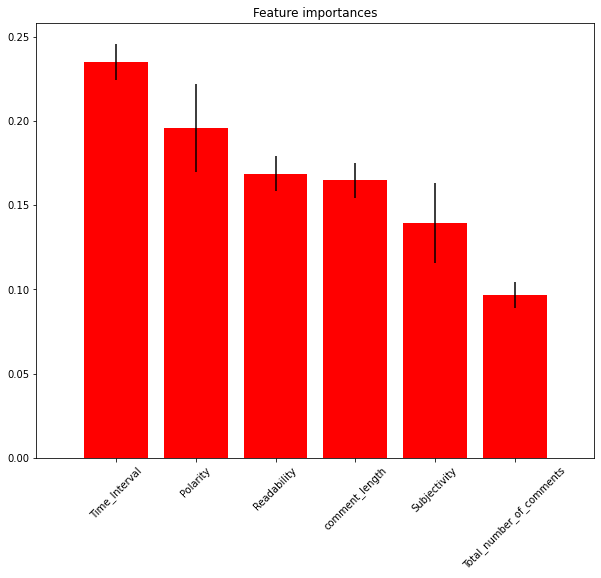

In [201]:
# Plot the feature importances of the forest
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(independent.shape[1]), importances[indices],
        tick_label=[independent.columns[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, independent.shape[1]])
_ = plt.xticks(rotation=45)

----------------------------

In [202]:
independent = not_nan[['comment_length','Readability','Polarity','Subjectivity','Total_number_of_comments']]
dependent = not_nan['Time_Interval']

In [203]:
# Split the dataset into a training and a testing set
# Test set will be the 20% taken randomly
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.20, 
                                                    shuffle=True, random_state=33)

In [204]:
from sklearn.ensemble import ExtraTreesRegressor

extremely_rts = ExtraTreesRegressor(n_estimators = 500, max_depth=None, min_samples_split=2, random_state = 42)

extremely_rts.fit(X_train, y_train)
scores = extremely_rts.score(X_test, y_test)
scores.mean()

-0.10581838954538858

In [205]:
importances = extremely_rts.feature_importances_

std = np.std([tree.feature_importances_ for tree in extremely_rts.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(independent.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], independent.columns[indices[f]], importances[indices[f]]))

1. feature 0 comment_length (0.313942)
2. feature 1 Readability (0.269739)
3. feature 3 Subjectivity (0.174593)
4. feature 2 Polarity (0.166054)
5. feature 4 Total_number_of_comments (0.075672)


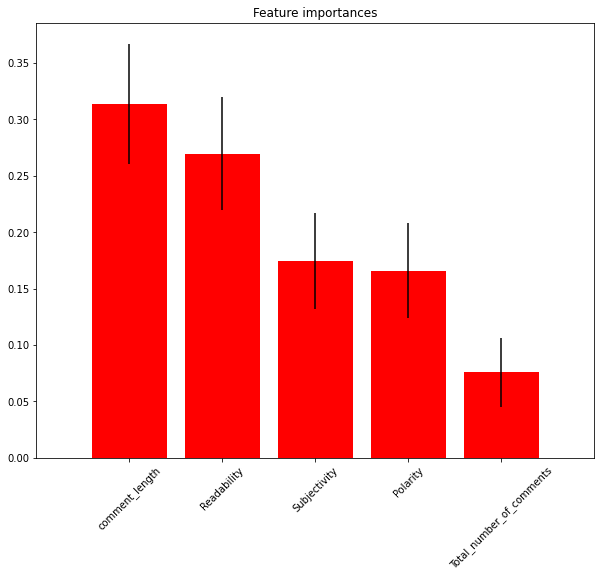

In [206]:
# Plot the feature importances of the forest
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(independent.shape[1]), importances[indices],
        tick_label=[independent.columns[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, independent.shape[1]])
_ = plt.xticks(rotation=45)

---------------------------------------

In [215]:
only_dates = all_data_no_read_outliers[['Date']]
only_dates

,Date
0,2012-01-04 22:01:33.920
1,2012-01-04 22:02:19.848
2,2012-01-05 22:42:21.672
3,2012-01-06 03:50:33.697
4,2012-01-08 21:36:57.811
...,...
30096,2017-07-13 18:41:21.038
30097,2017-07-18 15:43:30.472
30098,2017-08-09 02:25:02.503
30099,2017-10-09 19:52:13.747


In [216]:
only_dates.to_csv(r'C:\Users\GNR\OneDrive\Documents\Δ.Ε.Τ\PTIXIAKI\piankes\dates.csv', index=False)